# Machine learning

## I - Imports

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Sampling methods
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [8]:
def conf_matrix(y_true, _y_pred):
    cf_matrix = confusion_matrix(y_true, _y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues', ax=ax)

## II - Load data

In [2]:
wd = os.path.dirname(os.getcwd())
train_file = os.path.sep.join([wd, "asset", "data", "scaled_data_train.csv"])
test_file = os.path.sep.join([wd, "asset", "data", "scaled_data_test.csv"])

In [3]:
data = pd.read_csv(train_file)
X_train, y_train = data.drop("TARGET", axis=1), data["TARGET"]

data = pd.read_csv(test_file)
X_test, y_test = data.drop("TARGET", axis=1), data["TARGET"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((214391, 128), (214391,), (91828, 128), (91828,))

### Define the cross-validation, metrics

In [4]:
cv = StratifiedKFold(n_splits=3)
scoring = "f1"

## III - Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegressionCV
clf_LR = LogisticRegressionCV(scoring=scoring, cv=cv, class_weight="balanced", solver='liblinear', random_state=0)

#### Native indicator performance: no sampling

In [6]:
pipeline = Pipeline(steps=[('m', clf_LR)])
pipeline.fit(X_train, y_train)

print("average f1 score on train set", clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.23068020798325845
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     84380
           1       0.14      0.63      0.23      7502

    accuracy                           0.66     91882
   macro avg       0.55      0.65      0.51     91882
weighted avg       0.89      0.66      0.74     91882



#### Under sampling: 25, 50, 75%

In [8]:
under = RandomUnderSampler(sampling_strategy=.25)

pipeline = Pipeline(steps=[('u', under), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print("average f1 score on train set", clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.42050395726431283
              precision    recall  f1-score   support

           0       0.95      0.64      0.77     84380
           1       0.14      0.66      0.23      7502

    accuracy                           0.64     91882
   macro avg       0.55      0.65      0.50     91882
weighted avg       0.89      0.64      0.72     91882



In [9]:
under = RandomUnderSampler(sampling_strategy=.5)

pipeline = Pipeline(steps=[('u', under), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print("average f1 score on train set", clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.5446899634966788
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     84380
           1       0.14      0.64      0.23      7502

    accuracy                           0.66     91882
   macro avg       0.55      0.65      0.51     91882
weighted avg       0.89      0.66      0.74     91882



In [10]:
under = RandomUnderSampler(sampling_strategy=.75)

pipeline = Pipeline(steps=[('u', under), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print("average f1 score on train set", clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.6064002371992937
              precision    recall  f1-score   support

           0       0.97      0.23      0.37     84380
           1       0.10      0.91      0.17      7502

    accuracy                           0.28     91882
   macro avg       0.53      0.57      0.27     91882
weighted avg       0.90      0.28      0.35     91882



#### Over sampling: 25, 50, 75%

In [11]:
over = RandomOverSampler(sampling_strategy=.25)

pipeline = Pipeline(steps=[('o', over), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print("average f1 score on train set", clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.4265992641214344
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     84380
           1       0.14      0.65      0.23      7502

    accuracy                           0.65     91882
   macro avg       0.55      0.65      0.50     91882
weighted avg       0.89      0.65      0.73     91882



In [12]:
over = RandomOverSampler(sampling_strategy=.5)

pipeline = Pipeline(steps=[('o', over), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print("average f1 score on train set", clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.5528374616130252
              precision    recall  f1-score   support

           0       0.97      0.28      0.44     84380
           1       0.10      0.89      0.18      7502

    accuracy                           0.33     91882
   macro avg       0.53      0.59      0.31     91882
weighted avg       0.90      0.33      0.42     91882



In [13]:
over = RandomOverSampler(sampling_strategy=.75)

pipeline = Pipeline(steps=[('o', over), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print("average f1 score on train set", clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.6123131346823797
              precision    recall  f1-score   support

           0       0.97      0.23      0.37     84380
           1       0.10      0.91      0.17      7502

    accuracy                           0.29     91882
   macro avg       0.53      0.57      0.27     91882
weighted avg       0.90      0.29      0.36     91882



#### Hybrid sampling: Over & Under

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

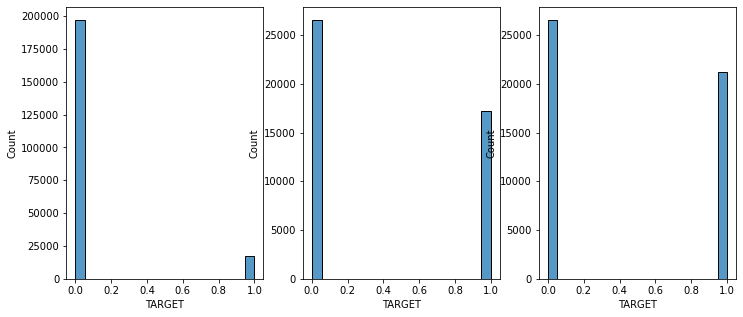

In [52]:
under = RandomUnderSampler(sampling_strategy=.65)
over = RandomOverSampler(sampling_strategy=.8)

pipeline = Pipeline(steps=[('u', under), ('m', clf_LR)])
a,b = under.fit_resample(X_train, y_train)
c,d = over.fit_resample(a, b)

fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=3)
axes=axes.ravel()
sns.histplot(y_train, ax=axes[0])
sns.histplot(b, ax=axes[1])
sns.histplot(d, ax=axes[2])

## IV - XGBoost

In [5]:
from xgboost import XGBClassifier
scale_pos_weight = y_train[y_train == 0].count() / y_train[y_train == 1].count()
clf_XGBoost = XGBClassifier(eta=.01, n_estimators=100, scale_pos_weight=scale_pos_weight, random_state=0, use_label_encoder=False, eval_metric="rmse")

#### Native indicator performance: no sampling

In [6]:
cv_scores = cross_val_score(X=X_train, y=y_train, estimator=clf_XGBoost, cv=cv, scoring="f1")
clf_XGBoost.fit(X_train, y_train)
print("average f1 score on train set", cv_scores.mean())
print(classification_report(y_test, clf_XGBoost.predict(X_test)))

average f1 score on train set 0.23070882202858042
              precision    recall  f1-score   support

           0       0.95      0.68      0.79     84323
           1       0.14      0.61      0.23      7505

    accuracy                           0.67     91828
   macro avg       0.55      0.65      0.51     91828
weighted avg       0.89      0.67      0.75     91828



In [10]:
y_pred = clf_XGBoost.predict(X_test)

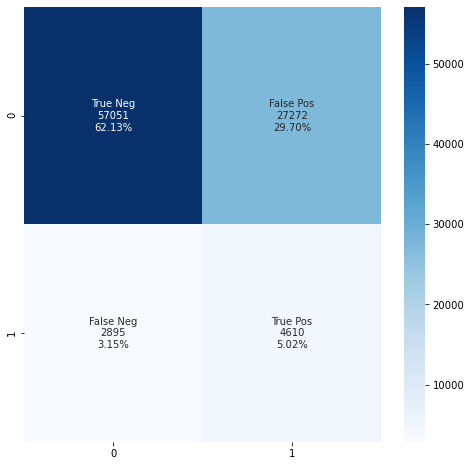

In [11]:
conf_matrix(y_test, y_pred)